In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir("E:\\FORE\\Term 3\\MLP\\household_power_consumption")

In [3]:
hp = pd.read_csv("household_power_consumption.txt", sep=";")

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
hp.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
hp3 = hp.iloc[ :, 2:9]

In [6]:
hp3

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2075254,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [7]:
hp3.dtypes

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [8]:
hp3.isnull().value_counts().reset_index()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,0
0,False,False,False,False,False,False,False,2049280
1,False,False,False,False,False,False,True,25979


In [9]:
hp3.dropna(inplace = True)

In [10]:
hp3.shape

(2049280, 7)

In [11]:
hp4 = hp3.replace("?","")

In [12]:
hp4.isnull().value_counts().reset_index()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,0
0,False,False,False,False,False,False,False,2049280


In [13]:
hp4 = hp4.astype(float)

In [14]:
hp4.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [15]:
hp5 = hp4.sample(n= 5000)

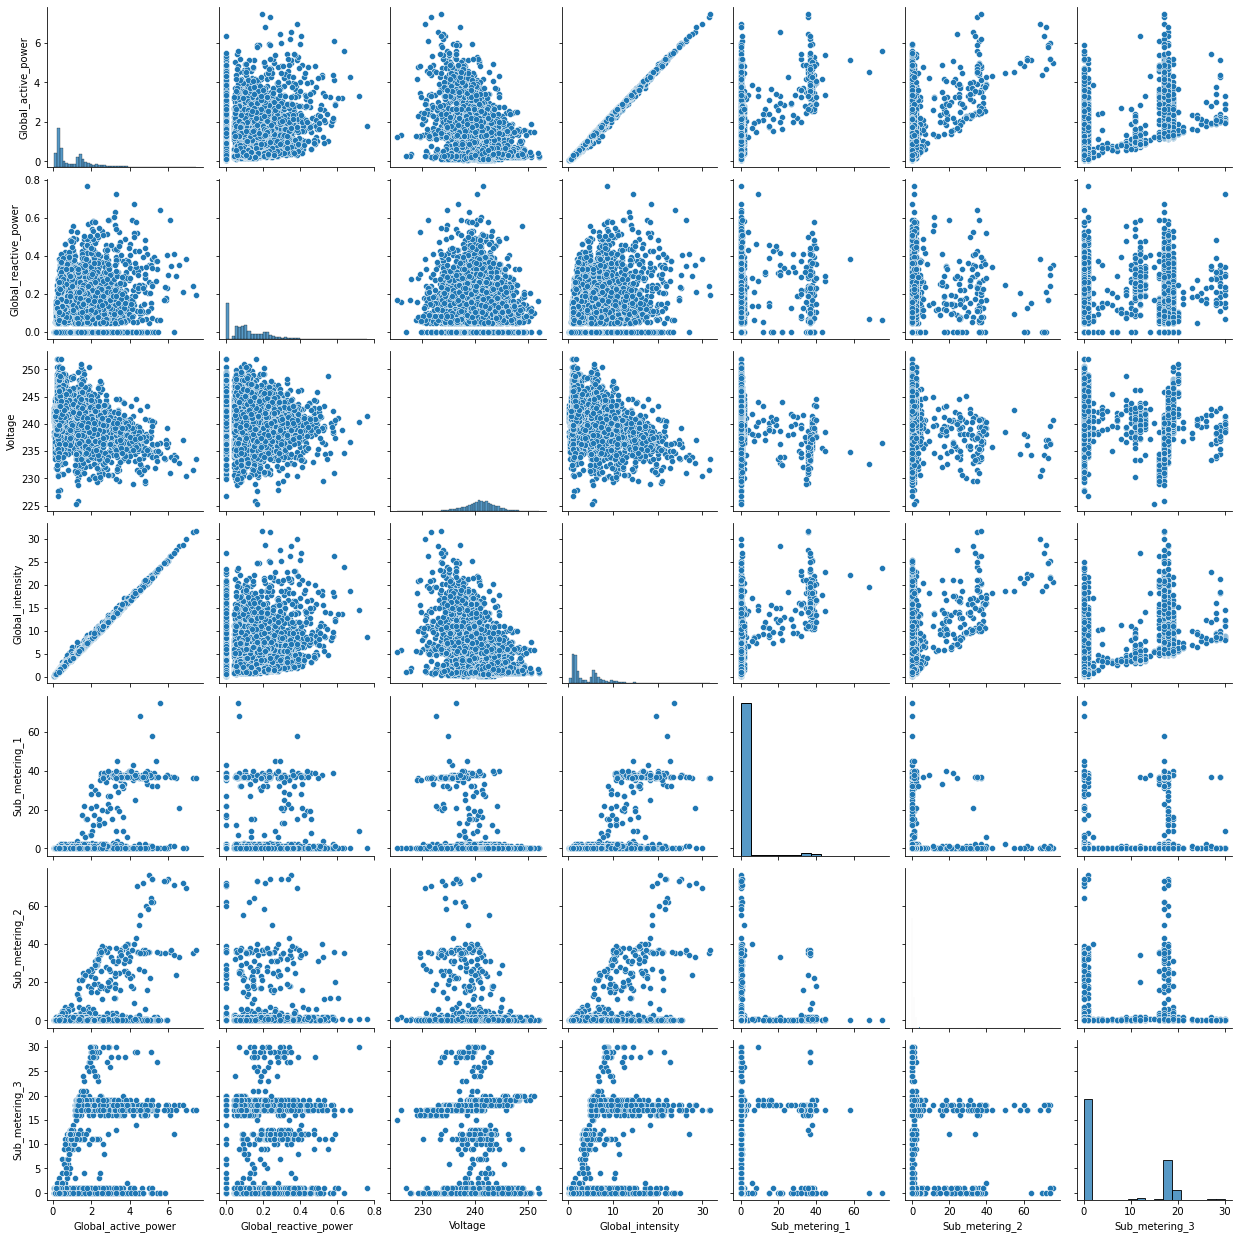

In [16]:
sns.pairplot(hp5) #to view correlation

In [17]:
hp5['Calc'] = ((hp5['Global_active_power']*1000)/60) - hp5['Sub_metering_1'] - hp5['Sub_metering_2'] - hp5['Sub_metering_3']

In [18]:
hp5.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Calc
556240,0.356,0.054,240.99,1.4,0.0,0.0,0.0,5.933333
1596652,2.936,0.284,242.50,12.6,0.0,0.0,19.0,29.933333
197299,0.194,0.092,237.08,0.8,0.0,0.0,0.0,3.233333
697225,2.296,0.000,238.64,9.6,1.0,0.0,19.0,18.266667
1919395,0.276,0.162,243.03,1.4,0.0,0.0,1.0,3.600000


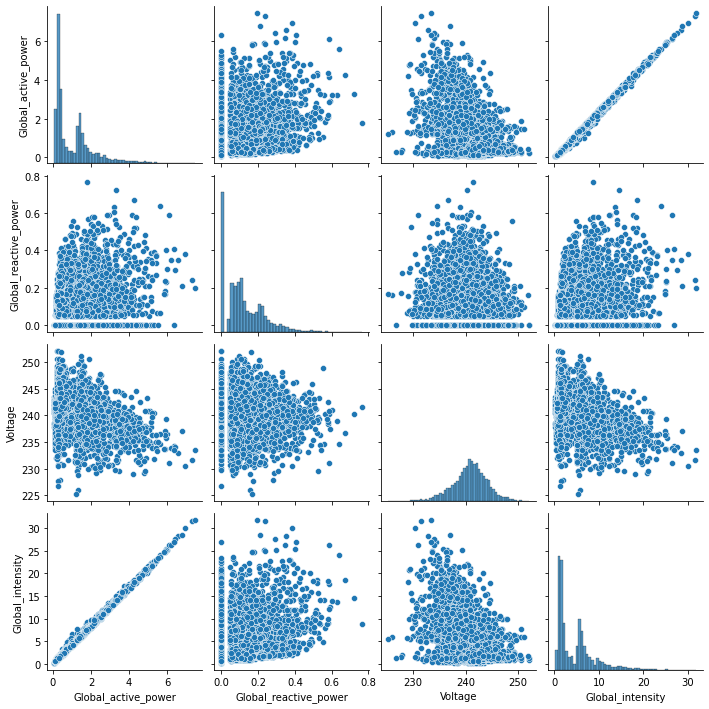

In [19]:
sns.pairplot(hp5.loc[:,['Global_active_power','Global_reactive_power', 'Voltage','Global_intensity']])
plt.show()

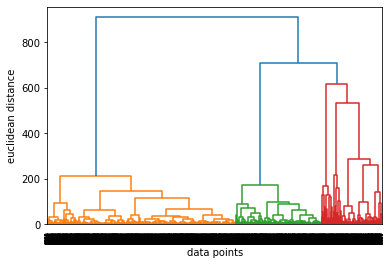

In [20]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(hp5, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(hp5)
hp5["label"] = cluster

In [31]:
hp5.label.value_counts()

4    2810
2    1293
0     609
3     171
1     117
Name: label, dtype: int64

In [32]:
hp5.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Calc,label,label2
556240,0.356,0.054,240.99,1.4,0.0,0.0,0.0,5.933333,4,1
1596652,2.936,0.284,242.50,12.6,0.0,0.0,19.0,29.933333,0,0
197299,0.194,0.092,237.08,0.8,0.0,0.0,0.0,3.233333,4,1
697225,2.296,0.000,238.64,9.6,1.0,0.0,19.0,18.266667,2,0
1919395,0.276,0.162,243.03,1.4,0.0,0.0,1.0,3.600000,4,1


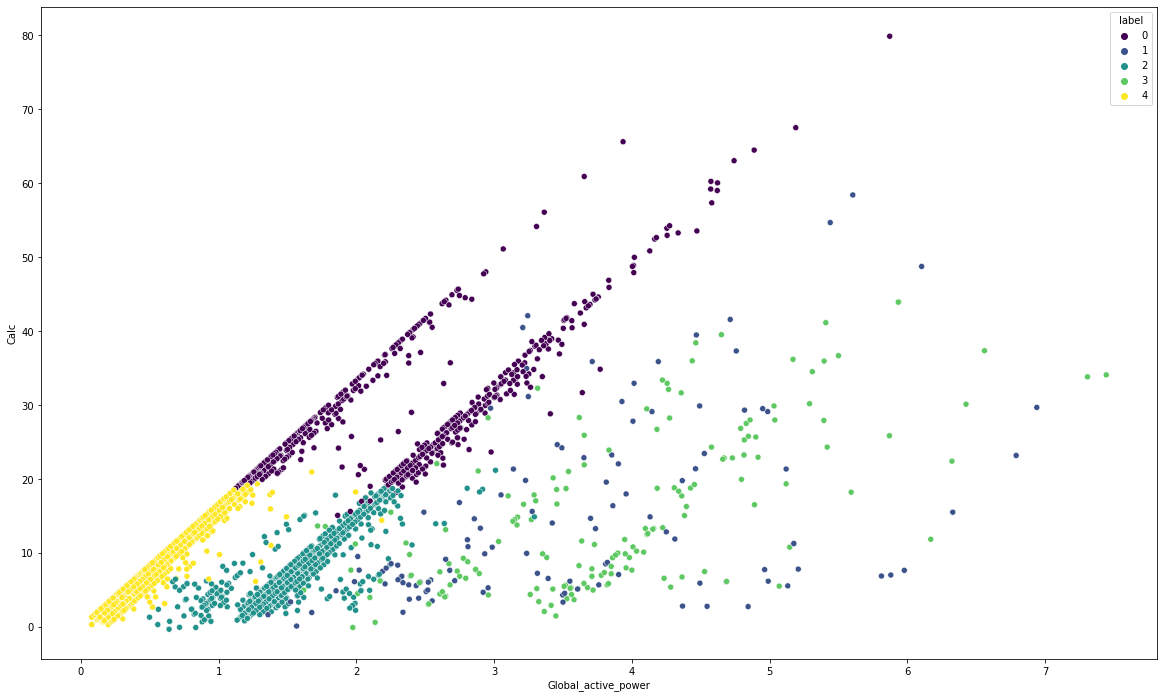

In [33]:
plt.figure(figsize = (20,12))

_=sns.scatterplot(x = "Global_active_power", y = "Calc", hue = "label", data= hp5 ,palette = "viridis")

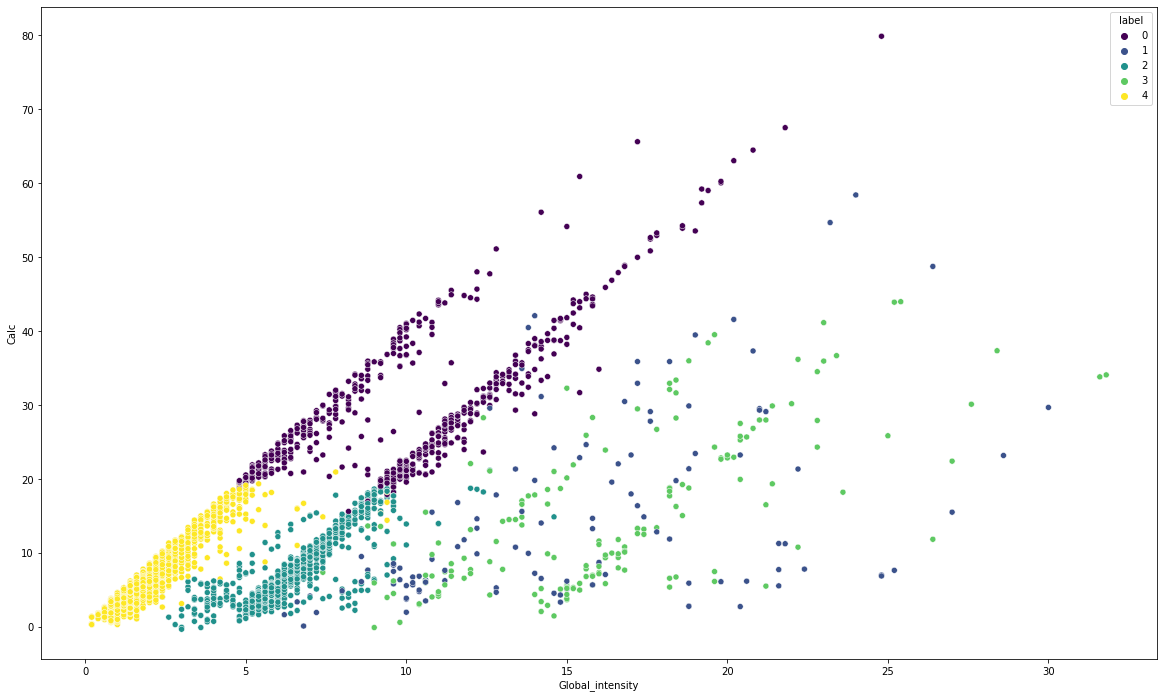

In [34]:
plt.figure(figsize = (20,12))

_=sns.scatterplot(x = "Global_intensity", y = "Calc", hue = "label", data= hp5 ,palette = "viridis")

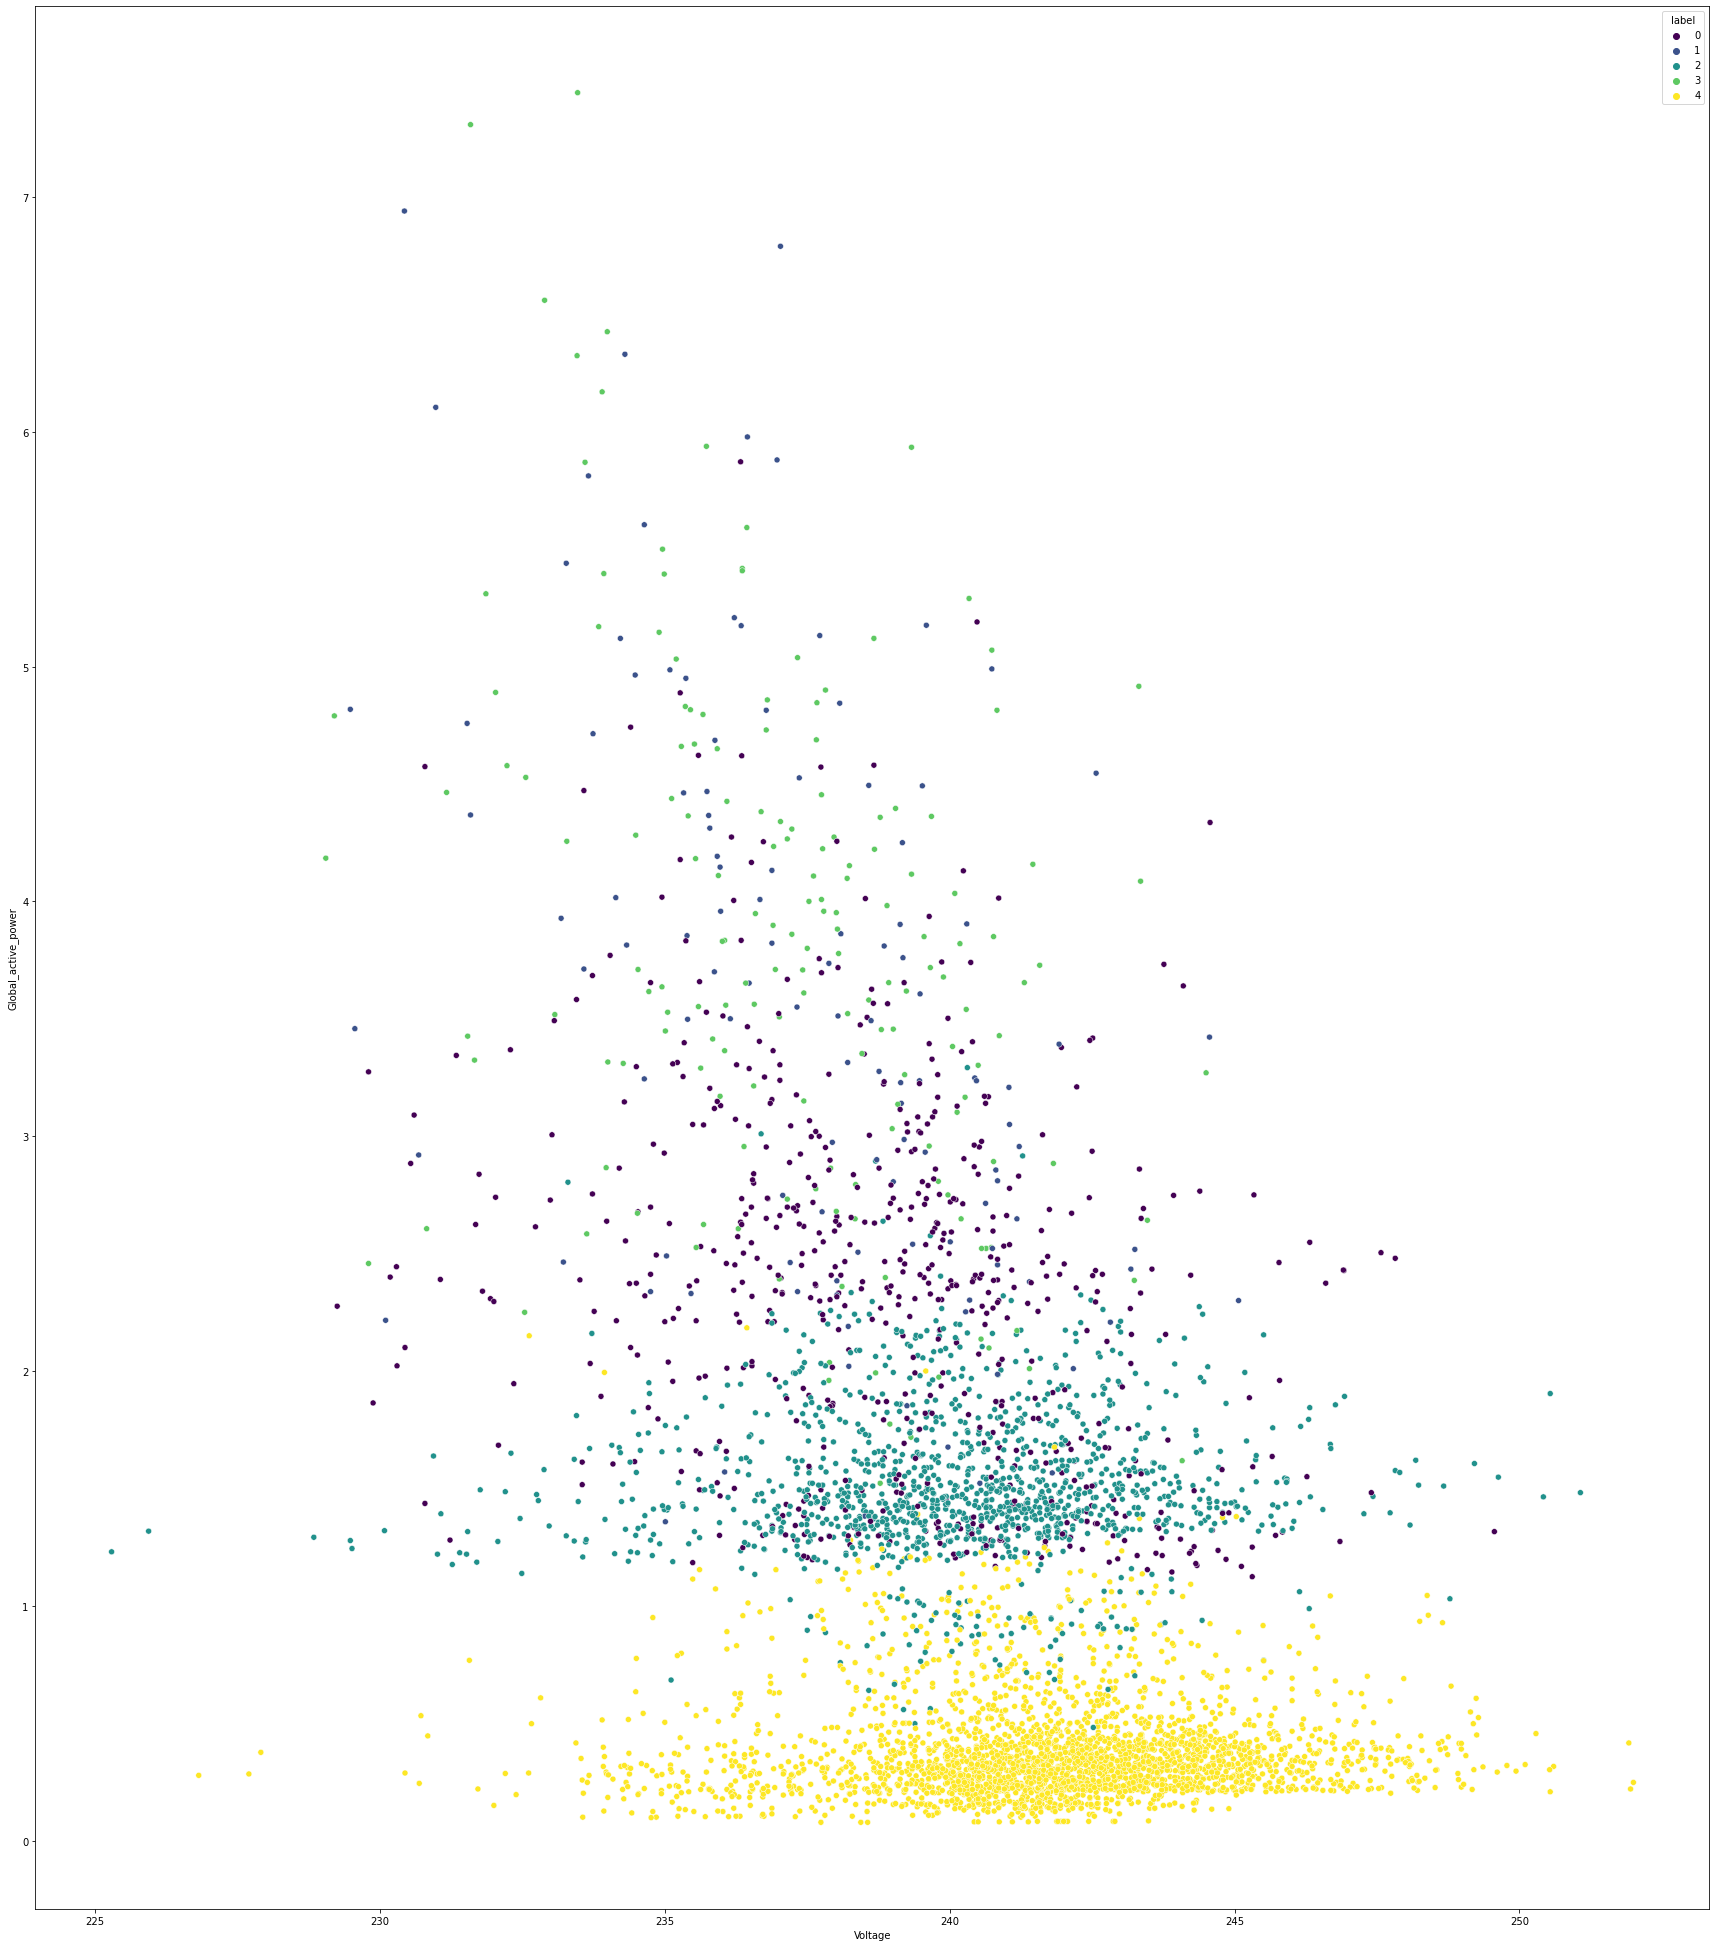

In [35]:
plt.figure(figsize = (30,35))

_=sns.scatterplot(x = "Voltage", y = "Global_active_power", hue = "label", data= hp5 ,palette = "viridis")

In [39]:
hp5.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Calc,label,label2
556240,0.356,0.054,240.99,1.4,0.0,0.0,0.0,5.933333,4,4
1596652,2.936,0.284,242.50,12.6,0.0,0.0,19.0,29.933333,0,0
197299,0.194,0.092,237.08,0.8,0.0,0.0,0.0,3.233333,4,4
697225,2.296,0.000,238.64,9.6,1.0,0.0,19.0,18.266667,2,2
1919395,0.276,0.162,243.03,1.4,0.0,0.0,1.0,3.600000,4,4
